# PolyaClassifier model development

**Purpose**: To develop a model that can predict the presence of yeast polyadenylation sites in genomic sequences.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

## IMPORTS AND SETUP

In [4]:
from paper_utilities import models


In [5]:
PROJECT   = "/projects/b1080/eks/polyadenylation/yeast"
OUTDIR    = os.path.join(PROJECT, 'manuscript', 'analysis', 'polyaclassifier_model_development')
RESOURCES = os.path.join(os.path.dirname(OUTDIR), 'resources')
os.makedirs(OUTDIR, exist_ok = True)


## ANALYSIS

### Saccharomyces cerevisiae

In [6]:
scer_test_data = pd.read_csv(os.path.join(RESOURCES, 'polyaclassifier_cross_species_predictions.scer_test_data_12345.pred_by_scer_bagging3models.txt'), sep = "\t")
print(f"Input sites:\n\t{scer_test_data.shape[0]}")

scer_test_data.loc[scer_test_data['supporting_reads'] >  0, 'obs_class'] = 1
scer_test_data.loc[scer_test_data['supporting_reads'] == 0, 'obs_class'] = 0
print(f"By class:\n\t{scer_test_data['obs_class'].value_counts().to_dict()}")


Input sites:
	8047
By class:
	{1.0: 4046, 0.0: 4001}


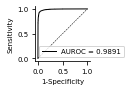

In [7]:
fig,ax = plt.subplots(1,1, figsize = (1,1))

ax.plot([0,1], [0,1], 'k--', linewidth = 0.5)

fpr, tpr, thresholds = roc_curve(scer_test_data['obs_class'], scer_test_data['classification'])
ax.plot(fpr, tpr, color = 'k', linewidth = 1, label = f'AUROC = {auc(fpr, tpr):.4f}')

ax.set_xlim((-0.05, 1.05))
ax.set_ylim((-0.05, 1.05))
ax.set_xlabel("1-Specificity")
ax.set_ylabel("Sensitivity")
ax.legend(loc = "best")
ax.set_aspect('equal')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

plt.savefig(os.path.join(OUTDIR, 'saccharomyces_cerevisiae.polyaclassifier.test.auroc.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


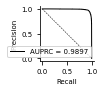

In [8]:
fig,ax = plt.subplots(1,1, figsize = (1,1))

ax.plot([0,1], [1,0], 'k--', linewidth = 0.5)

prc, rec, thresholds = precision_recall_curve(scer_test_data['obs_class'], scer_test_data['classification'])

## Manually add dot at recall=1 and precision=0 to force line to be completely drawn
prcPlot = np.concatenate(([0], prc))
recPlot = np.concatenate(([1], rec))

ax.plot(recPlot, prcPlot, color = 'k', linewidth = 1, label = f'AUPRC = {auc(rec, prc):.4f}')

ax.set_xlim((-0.05, 1.05))
ax.set_ylim((-0.05, 1.05))
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.legend(loc = "best")
ax.set_aspect('equal')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

plt.savefig(os.path.join(OUTDIR, 'saccharomyces_cerevisiae.polyaclassifier.test.auprc.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


### Schizoaccharomyces pombe

In [9]:
spom_test_data = pd.read_csv(os.path.join(RESOURCES, 'polyaclassifier_cross_species_predictions.spom_test_data_12345.pred_by_spom_bagging3models.txt'), sep = "\t")
print(f"Input sites:\n\t{spom_test_data.shape[0]}")

spom_test_data.loc[spom_test_data['supporting_reads'] >  0, 'obs_class'] = 1
spom_test_data.loc[spom_test_data['supporting_reads'] == 0, 'obs_class'] = 0
print(f"By class:\n\t{spom_test_data['obs_class'].value_counts().to_dict()}")


Input sites:
	2515
By class:
	{1.0: 1269, 0.0: 1246}


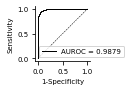

In [10]:
fig,ax = plt.subplots(1,1, figsize = (1,1))

ax.plot([0,1], [0,1], 'k--', linewidth = 0.5)

fpr, tpr, thresholds = roc_curve(spom_test_data['obs_class'], spom_test_data['classification'])
ax.plot(fpr, tpr, color = 'k', linewidth = 1, label = f'AUROC = {auc(fpr, tpr):.4f}')

ax.set_xlim((-0.05, 1.05))
ax.set_ylim((-0.05, 1.05))
ax.set_xlabel("1-Specificity")
ax.set_ylabel("Sensitivity")
ax.legend(loc = "best")
ax.set_aspect('equal')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

plt.savefig(os.path.join(OUTDIR, 'schizosaccharomyces_pombe.polyaclassifier.test.auroc.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


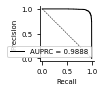

In [11]:
fig,ax = plt.subplots(1,1, figsize = (1,1))

ax.plot([0,1], [1,0], 'k--', linewidth = 0.5)

prc, rec, thresholds = precision_recall_curve(spom_test_data['obs_class'], spom_test_data['classification'])

## Manually add dot at recall=1 and precision=0 to force line to be completely drawn
prcPlot = np.concatenate(([0], prc))
recPlot = np.concatenate(([1], rec))

ax.plot(recPlot, prcPlot, color = 'k', linewidth = 1, label = f'AUPRC = {auc(rec, prc):.4f}')

ax.set_xlim((-0.05, 1.05))
ax.set_ylim((-0.05, 1.05))
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.legend(loc = "best")
ax.set_aspect('equal')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

plt.savefig(os.path.join(OUTDIR, 'schizosaccharomyces_pombe.polyaclassifier.test.auprc.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


### Arabidopsis thaliana

In [12]:
atha_test_data = pd.read_csv(os.path.join(RESOURCES, 'polyaclassifier_cross_species_predictions.atha_test_data_12345.pred_by_atha_bagging3models.txt'), sep = "\t")
print(f"Input sites:\n\t{atha_test_data.shape[0]}")

atha_test_data.loc[atha_test_data['supporting_reads'] >  0, 'obs_class'] = 1
atha_test_data.loc[atha_test_data['supporting_reads'] == 0, 'obs_class'] = 0
print(f"By class:\n\t{atha_test_data['obs_class'].value_counts().to_dict()}")


Input sites:
	9415
By class:
	{1.0: 4764, 0.0: 4651}


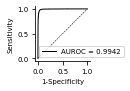

In [13]:
fig,ax = plt.subplots(1,1, figsize = (1,1))

ax.plot([0,1], [0,1], 'k--', linewidth = 0.5)

fpr, tpr, thresholds = roc_curve(atha_test_data['obs_class'], atha_test_data['classification'])
ax.plot(fpr, tpr, color = 'k', linewidth = 1, label = f'AUROC = {auc(fpr, tpr):.4f}')

ax.set_xlim((-0.05, 1.05))
ax.set_ylim((-0.05, 1.05))
ax.set_xlabel("1-Specificity")
ax.set_ylabel("Sensitivity")
ax.legend(loc = "best")
ax.set_aspect('equal')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

plt.savefig(os.path.join(OUTDIR, 'arabidopsis_thaliana.polyaclassifier.test.auroc.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


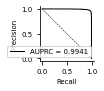

In [14]:
fig,ax = plt.subplots(1,1, figsize = (1,1))

ax.plot([0,1], [1,0], 'k--', linewidth = 0.5)

prc, rec, thresholds = precision_recall_curve(atha_test_data['obs_class'], atha_test_data['classification'])

## Manually add dot at recall=1 and precision=0 to force line to be completely drawn
prcPlot = np.concatenate(([0], prc))
recPlot = np.concatenate(([1], rec))

ax.plot(recPlot, prcPlot, color = 'k', linewidth = 1, label = f'AUPRC = {auc(rec, prc):.4f}')

ax.set_xlim((-0.05, 1.05))
ax.set_ylim((-0.05, 1.05))
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.legend(loc = "best")
ax.set_aspect('equal')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

plt.savefig(os.path.join(OUTDIR, 'arabidopsis_thaliana.polyaclassifier.test.auprc.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()
